In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta


# -------------------------------
# Load and Explore the Data
# -------------------------------

df=pd.read_csv(r"C:\Users\ayush\Downloads\Spotify+Streaming+History\spotify_history.csv")
df.head()

,spotify_track_uri,endTime,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,08-07-2013 02:44,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,08-07-2013 02:45,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,08-07-2013 02:50,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,08-07-2013 02:52,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,08-07-2013 03:17,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   endTime            149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB
None


In [42]:
print(df.describe())

          ms_played
count  1.498600e+05
mean   1.283166e+05
std    1.178401e+05
min    0.000000e+00
25%    2.795000e+03
50%    1.388400e+05
75%    2.185070e+05
max    1.561125e+06


In [43]:
print(df.isnull().sum())

spotify_track_uri      0
endTime                0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64


In [ ]:

# -------------------------------
# Preprocessing:
# -------------------------------

#Changing the datatype of endTime column from object to timestampe
df['endTime'] = pd.to_datetime(df['endTime'], format='%d-%m-%Y %H:%M')

# Create additional time-based columns
df['date'] = df['endTime'].dt.date
df['year'] = df['endTime'].dt.year
df['month'] = df['endTime'].dt.month
df['day'] = df['endTime'].dt.day
df['hour'] = df['endTime'].dt.hour
df['weekday'] = df['endTime'].dt.day_name()

# Rename the column from "msPlayed" to "hours_played"
df.rename(columns={'ms_played': 'minute_played'}, inplace=True)
    
# Convert milliseconds to hours (1 mintue = 60,000 ms)
df['minute_played'] = df['minute_played'] / 60000

# deleting skipped column
df.drop(columns=['skipped','shuffle'],inplace=True)

# Filling missing values in reason_end and reason_start columns
df['reason_start'] = df['reason_start'].fillna(df['reason_start'].mode()[0])
df['reason_end']=df['reason_end'].fillna(df['reason_end'].mode()[0])


In [50]:
# Cleaned data
print(df.head())
print()
print("total null values ",df.isnull().sum().sum())

        spotify_track_uri             endTime    platform  minute_played  \
0  2J3n32GeLmMjwuAzyhcSNe 2013-07-08 02:44:00  web player       0.053083   
1  1oHxIPqJyvAYHy0PVrDU98 2013-07-08 02:45:00  web player       1.031083   
2  487OPlneJNni3NWC8SYqhW 2013-07-08 02:50:00  web player       4.756433   
3  5IyblF777jLZj1vGHG2UD3 2013-07-08 02:52:00  web player       2.233700   
4  0GgAAB0ZMllFhbNc3mAodO 2013-07-08 03:17:00  web player       0.000000   

                                      track_name        artist_name  \
0                            Say It, Just Say It       The Mowgli's   
1  Drinking from the Bottle (feat. Tinie Tempah)      Calvin Harris   
2                                    Born To Die       Lana Del Rey   
3                               Off To The Races       Lana Del Rey   
4                                      Half Mast  Empire Of The Sun   

                           album_name reason_start reason_end        date  \
0                Waiting For The Dawn  

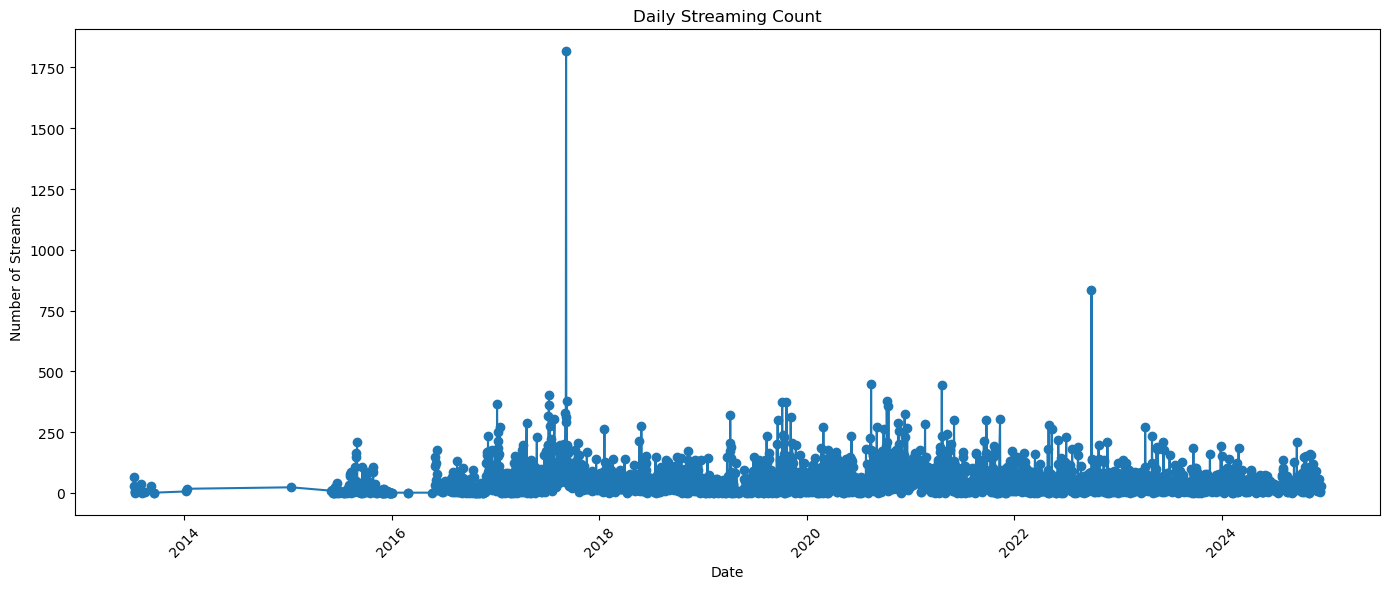

In [51]:
# -------------------------------
# Listening Habits Over Time
# -------------------------------

# a) Count of streams per day
daily_listens = df.groupby('date').size().reset_index(name='listen_count')
plt.figure(figsize=(14, 6))
plt.plot(daily_listens['date'], daily_listens['listen_count'], marker='o')
plt.title('Daily Streaming Count')
plt.xlabel('Date')
plt.ylabel('Number of Streams')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

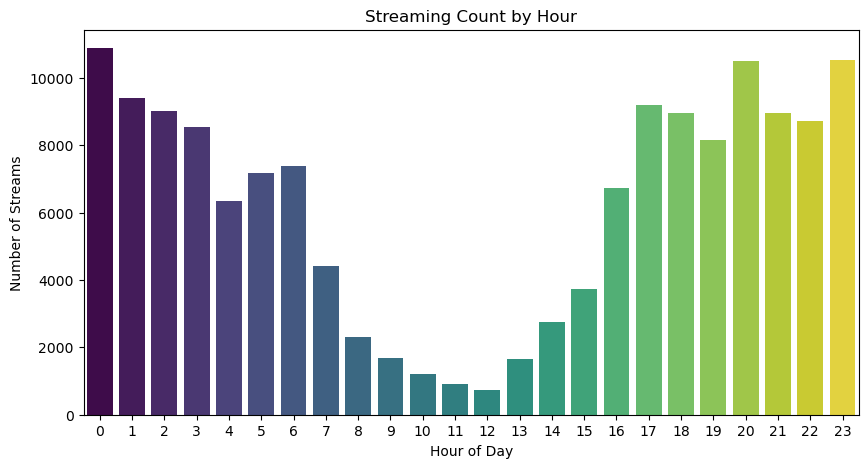

In [52]:
# b) Peak listening hours
hourly_listens = df.groupby('hour').size().reset_index(name='listen_count')
plt.figure(figsize=(10, 5))
sns.barplot(x='hour', y='listen_count', hue='hour', data=hourly_listens, palette='viridis', legend=False)
plt.title('Streaming Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Streams')
plt.show()


Top 10 Tracks:
 track_name
Ode To The Mets                      207
In the Blood                         181
Dying Breed                          166
Caution                              164
19 Dias y 500 Noches - En Directo    148
For What It's Worth                  146
All These Things That I've Done      142
Concerning Hobbits                   142
Come Together - Remastered 2009      137
The Boxer                            135
Name: count, dtype: int64


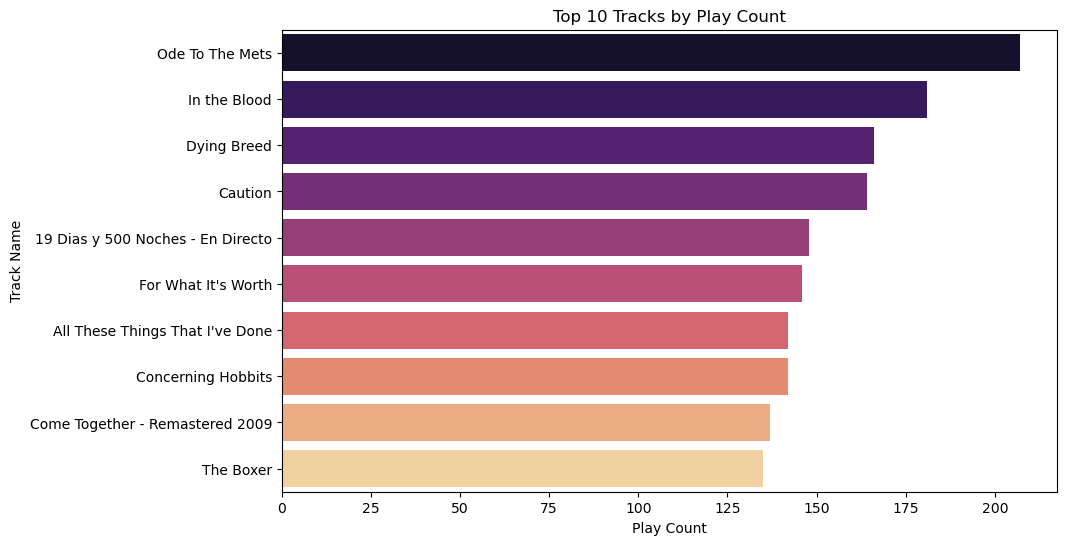

In [53]:
# -------------------------------
# Top Tracks and Artists Analysis
# -------------------------------

# a) Top tracks by play count (or total ms played if available)
top_tracks = df['track_name'].value_counts().head(10)
print("Top 10 Tracks:\n", top_tracks)

# Plot top tracks
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tracks.values, y=top_tracks.index, hue=top_tracks.index, palette='magma', legend=False)
plt.title('Top 10 Tracks by Play Count')
plt.xlabel('Play Count')
plt.ylabel('Track Name')
plt.show()



Top 10 Artists:
 artist_name
The Beatles           13621
The Killers            6878
John Mayer             4855
Bob Dylan              3814
Paul McCartney         2697
Led Zeppelin           2482
Johnny Cash            2478
The Rolling Stones     2390
Radiohead              2305
The Black Keys         2231
Name: count, dtype: int64


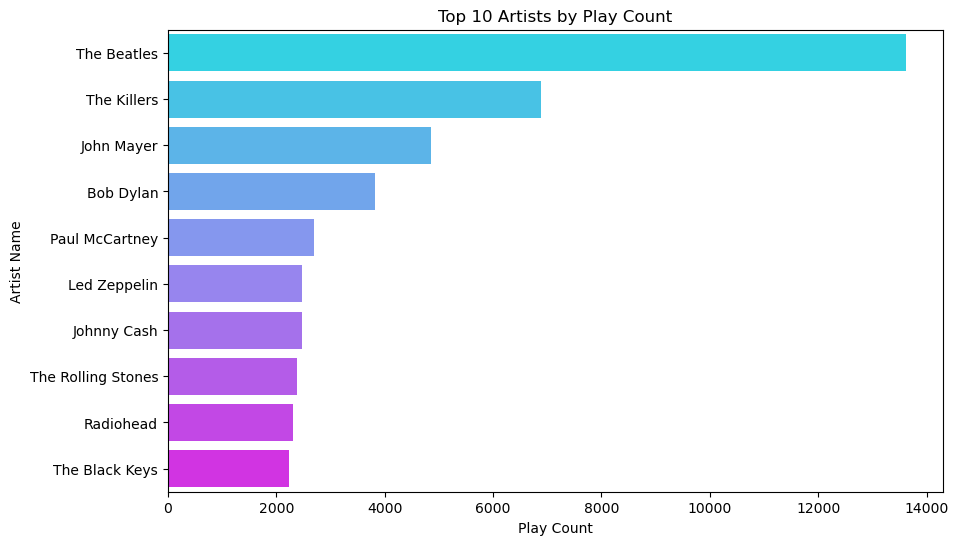

In [26]:
# Top Artists listened
top_artists = df['artist_name'].value_counts().head(10)
print("\nTop 10 Artists:\n", top_artists)

# Plot top artists
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, hue=top_artists.index, palette='cool', legend=False)
plt.title('Top 10 Artists by Play Count')
plt.xlabel('Play Count')
plt.ylabel('Artist Name')
plt.show()

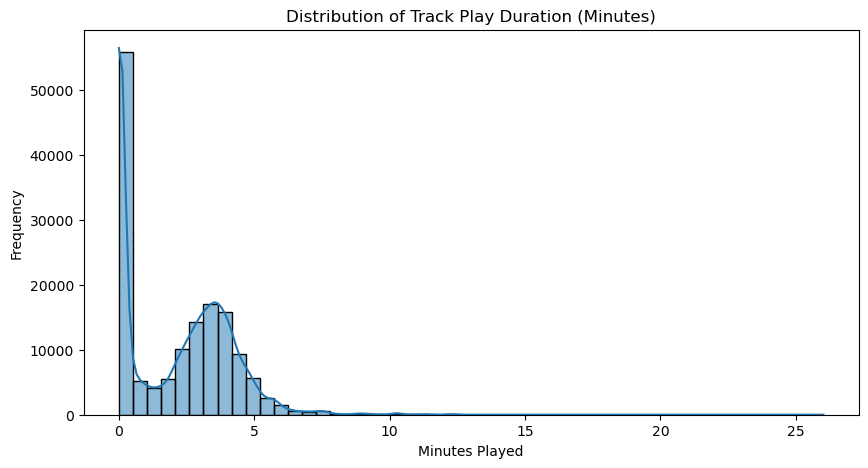

In [54]:
# Simple analysis: Distribution of play duration per track
plt.figure(figsize=(10, 5))
sns.histplot(df['minute_played'], bins=50, kde=True)
plt.title('Distribution of Track Play Duration (Minutes)')
plt.xlabel('Minutes Played')
plt.ylabel('Frequency')
plt.show()

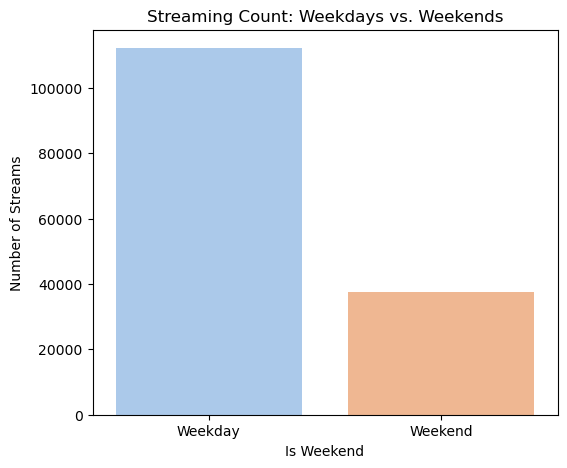

In [55]:
# -------------------------------
# Weekday vs. Weekend Trends
# -------------------------------

df['isWeekend'] = df['weekday'].isin(['Saturday', 'Sunday'])
weekend_weekday = df.groupby('isWeekend').size().reset_index(name='listen_count')

plt.figure(figsize=(6, 5))
sns.barplot(x='isWeekend', y='listen_count', data=weekend_weekday, palette='pastel',hue="isWeekend",legend=False)
plt.title('Streaming Count: Weekdays vs. Weekends')
plt.xlabel('Is Weekend')
plt.ylabel('Number of Streams')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()


               minute_played      year     month       day      hour
minute_played       1.000000  0.205498 -0.049396  0.027993  0.048194
year                0.205498  1.000000 -0.163912  0.035130 -0.011205
month              -0.049396 -0.163912  1.000000  0.006483  0.024913
day                 0.027993  0.035130  0.006483  1.000000  0.001241
hour                0.048194 -0.011205  0.024913  0.001241  1.000000


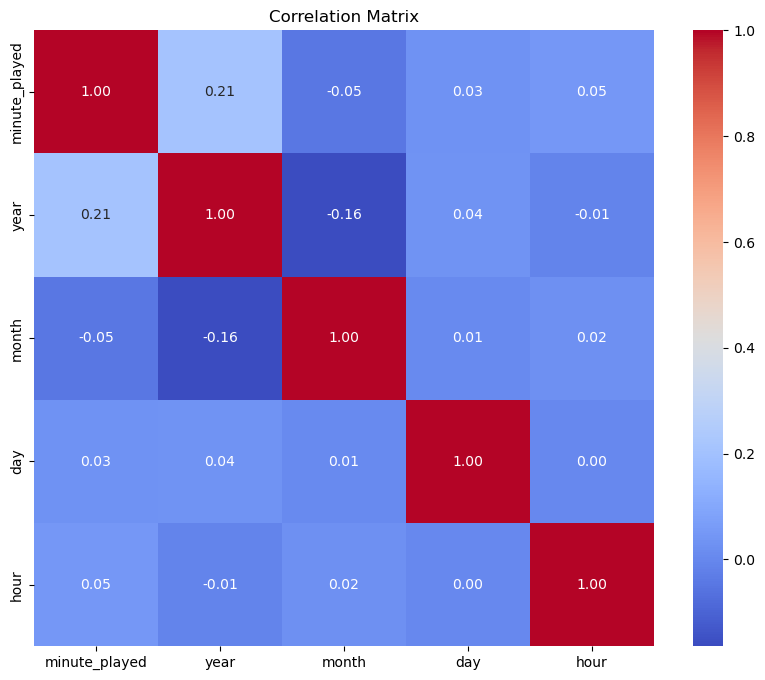

In [56]:
# Finding Correlation and showing HeatMap
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [57]:
#Doing z-test on two artists

from statsmodels.stats.weightstats import ztest
group1 = df[df['artist_name'] == 'Lana Del Rey']['minute_played'].dropna()
group2 = df[df['artist_name'] == 'The Beatles']['minute_played'].dropna()

z_stat, p_value = ztest(group1,group2)

print(f"Z-statistic: {z_stat:.4f}")
print(f"p-value: {p_value: .4f}")

alpha=0.05
if p_value<alpha:
    print("Reject null hypothesis: there is a significant difference")
else:
    print("Fail to reject the null hypothesis: no significant difference")

Z-statistic: 10.7985
p-value:  0.0000
Reject null hypothesis: there is a significant difference
